In [1]:
from diff_viz import data_loading
import pandas as pd
from os import getcwd, chdir
from diff_predictor import data_process
from os import listdir, getcwd, chdir
from os.path import isfile, join
import matplotlib.pyplot as plt

from diff_classifier.features import alpha_calc, unmask_track
from diff_classifier.msd import msd_calc
from diff_classifier import heatmaps as hm
import os

In [11]:
chdir('..')

In [13]:
getcwd()

'/Users/nelsschimek/Documents/nancelab'

In [2]:
age_msd_path = '/Users/nelsschimek/Documents/nancelab/Data/msd_data_age/'
p14_msd_file_list = [f for f in listdir(age_msd_path) if isfile(join(age_msd_path, f)) and 'msd_P14' in f and 'csv' in f]


In [26]:
df = pd.read_csv(test_msd_path + msd_file_list[0])
df.columns

Index(['Unnamed: 0', 'Frame', 'Track_ID', 'X', 'Y', 'MSDs', 'Gauss', 'Quality',
       'SN_Ratio', 'Mean_Intensity'],
      dtype='object')

In [3]:
def get_traj_list(df):   

    traj_dict_list = []

    trackids = df.Track_ID.unique()
    partcount = trackids.shape[0]

    for particle in range(0, partcount):
        single_track_masked =\
            df.loc[df['Track_ID'] ==
                    trackids[particle]].sort_values(['Track_ID', 'Frame'],
                                                    ascending=[
                                                    1,
                                                    1]).reset_index(drop=True)
        single_track = unmask_track(single_track_masked)
        # alph, coef = alpha_calc(single_track)
        # if (len(single_track) > 66) & (alph > 0):
        #     rc_short = (single_track['MSDs'][33] / 4 * 33) / (single_track['MSDs'][7] / 4*7)
        #     rc_long = (single_track['MSDs'][66] / 4 * 66) / (single_track['MSDs'][33] / 4*33)
        #     new_dict = {
        #         'X': single_track['X'],
        #         'Y': single_track['Y'],
        #         'alpha': alph,
        #         'rc_short': rc_short,
        #         'rc_long': rc_long
        #    }
        traj_dict_list.append(single_track)
    return traj_dict_list

In [34]:
traj_dict_list[0]

,Frame,Track_ID,X,Y,MSDs,Gauss,Quality,SN_Ratio,Mean_Intensity
0,0.0,0.0,493.296,1764.802,0.000000,0.000000,6.751,0.8350,545.7210
1,1.0,0.0,490.178,1764.781,25.300931,0.964827,6.994,0.9620,544.6900
2,2.0,0.0,492.602,1759.460,42.179067,1.143676,6.466,0.8370,545.0470
3,3.0,0.0,491.629,1761.547,60.700740,1.055950,6.015,0.7840,537.8220
4,4.0,0.0,493.767,1764.706,89.243323,0.985296,5.775,0.7380,537.1860
5,5.0,0.0,492.025,1759.097,117.725055,0.811642,5.495,0.9930,541.0540
6,6.0,0.0,491.285,1755.347,127.505793,0.785835,4.207,0.6580,534.6120
7,7.0,0.0,484.101,1756.267,145.940751,0.679448,8.214,1.1870,549.5970
8,8.0,0.0,493.952,1752.207,152.568982,0.667209,5.140,0.5570,535.8600
9,9.0,0.0,489.940,1754.692,156.738760,0.660708,7.079,0.8530,540.5500


In [4]:
def basic_traj_plot(traj):   
    fig = plt.plot(traj['X'], traj['Y'])
    xmin = traj['X'].min()
    xmax = traj['X'].max()
    ymin = traj['Y'].min()
    ymax = traj['Y'].max()

    # xrange = [(xmax+xmin)/2 - 17.5,(xmax+xmin)/2 + 17.5]
    # yrange = [(ymax+ymin)/2 - 17.5,(ymax+ymin)/2 + 17.5]

    xrange = [(xmax+xmin)/2 - 50,(xmax+xmin)/2 + 50]
    yrange = [(ymax+ymin)/2 - 50,(ymax+ymin)/2 + 50]

   
    plt.xlim(xrange)
    plt.ylim(yrange)
    #return fig

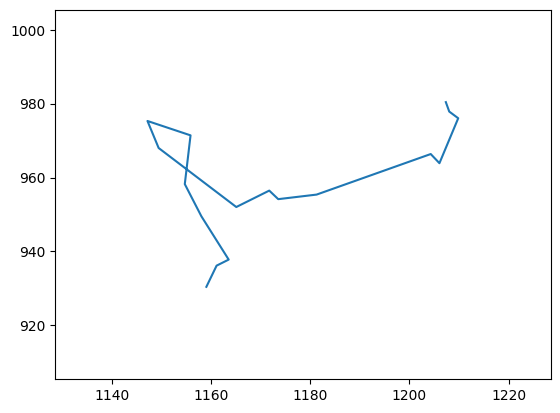

In [87]:
fig = basic_traj_plot(traj_list[100])

In [132]:
df = pd.read_csv(age_msd_path + 'msd_P14_40nm_s2_v4.csv')
df['Track_ID'].unique().shape

(162,)

In [131]:
#traj_list = get_traj_list(df[df['Track_ID'].isin(([82,31,14,11,4 ]))])
len(traj_list)

5

In [121]:
traj_list[3]

,Frame,Track_ID,X,Y,MSDs,Gauss,Quality,SN_Ratio,Mean_Intensity
0,0.0,31.0,1839.157665,1575.118814,0.000000,0.000000,11.463165,1.338019,268.271318
1,1.0,31.0,1850.739672,1574.931621,60.168436,0.834526,9.230331,0.938536,256.302326
2,2.0,31.0,1853.518820,1583.827065,141.488587,0.776526,5.241974,0.775775,245.364341
3,3.0,31.0,1854.241756,1583.378879,202.608779,0.727719,6.275631,0.898542,249.850775
4,4.0,31.0,1854.964692,1582.930692,265.029737,0.529525,7.309288,1.021309,254.337209
5,5.0,31.0,1855.687628,1582.482506,311.719426,0.517762,8.342945,1.144075,258.823643
6,6.0,31.0,1856.410564,1582.034320,351.013901,0.577164,9.376602,1.266842,263.310078
7,7.0,31.0,1854.010000,1577.814827,421.297115,0.557724,10.874359,1.150346,266.767442
8,8.0,31.0,1865.734526,1576.088379,543.121008,0.530664,7.778732,1.065364,257.674419
9,9.0,31.0,1859.947944,1577.971486,540.978930,0.539613,6.693604,1.079622,254.821705


In [122]:
testing_track = traj_list[5]
testing_track['X_delta'] = testing_track['X'].diff().fillna(0)
testing_track['Y_delta'] = testing_track['Y'].diff().fillna(0)
testing_track

IndexError: list index out of range

In [127]:
def plot_all_particles(traj_list):
    fig = plt.figure()
    for traj in traj_list:
        plt.plot(traj['X'], traj['Y'])
    return fig

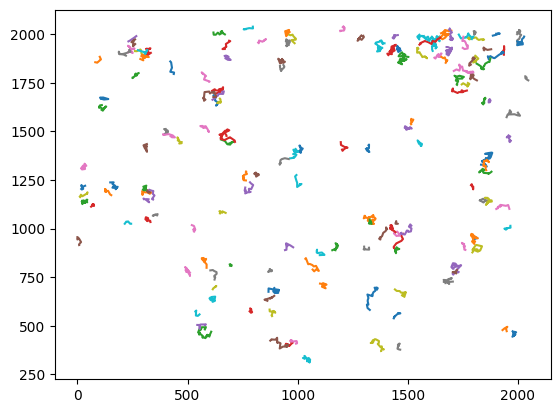

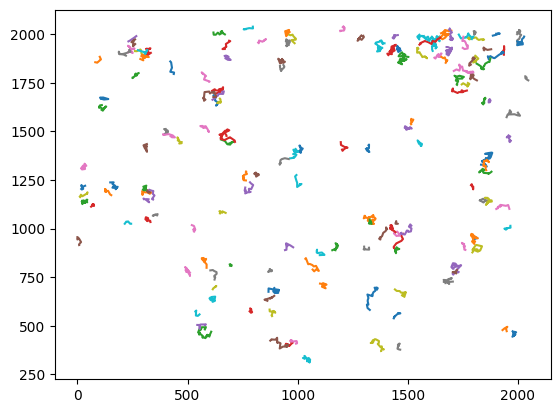

In [133]:
plot_all_particles(get_traj_list(df))

In [125]:
def basic_radial_plot(track_list):
    fig = plt.figure()
    #ax = fig.add_subplot(111)
    for track in track_list:
        #print(track)
        track['X_delta'] = track['X'].diff().fillna(0)
        track['Y_delta'] = track['Y'].diff().fillna(0)
        plt.plot(track['X_delta'], track['Y_delta'], alpha=0.5)
    plt.xlim([-30,30])
    plt.ylim([-30,30])
    return fig

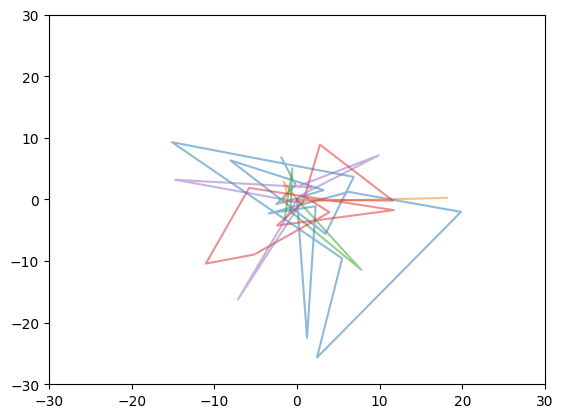

In [126]:
fig = basic_radial_plot(traj_list)

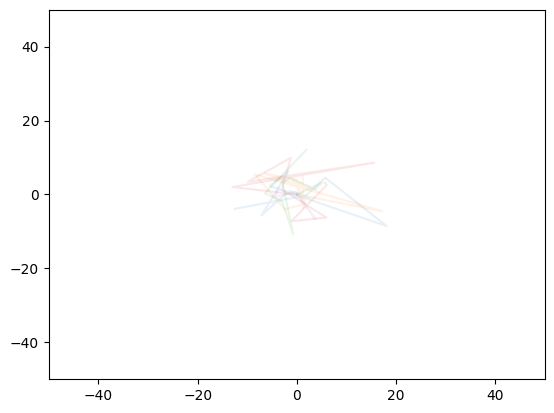

In [114]:
fig = basic_radial_plot(traj_list)

(-50.0, 50.0)

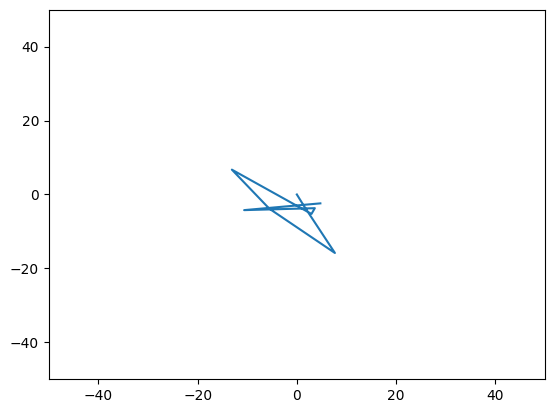

In [32]:
plt.plot(testing_track['X_delta'], testing_track['Y_delta'])
plt.xlim([-50,50])
plt.ylim([-50,50])

In [34]:
len(traj_list[456])

33

In [49]:
1350%

11

In [100]:
df = pd.read_csv(age_msd_path + 'msd_P14_40nm_s1_v5.csv')
traj_list = get_traj_list(df)
len(traj_list)

268

In [101]:


save_path = age_msd_path+'P14_S1_V5_individual_traj_plots_bigger_plot/'
os.mkdir(save_path)

for track_id in df['Track_ID'].unique():
    if int(track_id)%1 == 0:
        #print(int(track_id))
        #traj = df.loc[df['Track_ID'] == track_id]
        basic_traj_plot(traj_list[int(track_id)])
        #print(fig)
        plt.savefig(join(save_path, 'P14_40nm_s1_v5_' + str(track_id) + '.png'))
        plt.close(fig)